# Gameplan

This project will implement 6 steps inspired by the step-by-step plan outlined in the book Machine Learning Engineering by Andriy Burkov. These steps will include the following in order:

1. Goal Preparation (Objective)
2. Data Collection & Preparation
  - Train, Valid, Test Split
  - Exploratory Data Analysis
3. Feature Engineering
  - Feature Scaling
  - Feature Importance
4. Model Training
  - Model Versioning
5. Model Evaluation
6. Model Deployment


# Goal Preparation (Objective)

In this project, we will be creating a ML model implementation for the HouseCanary Bulk Housing Dataset.
- This will be a 'Build-Your-Dream-Home' front facing consumer app for the at-home user to input several characteristics they are looking for in buying a home and have a price come out the other end. The concept should be very easy to use and give a relatively good price estimate for the house they have created.
- On the app itself, we will feature a link that will lead the customer into our sales funnel by being able to input their home selections into a filter that will find exact matches of homes.
  - Although I will not build this section out, my goal is to show the business impact that a "Build-Your-Dream-Home" app would have in leading customers to start the home buying process more smoothly.

We will focus on fast predictions with a small amount of columns used. Ease-of-use and interpretability are key objectives for this model.

We will also keep in mind that the project will not offer a great deal of accuracy because the dataset we have chosen is limited in size. However, the concepts laid out in the ML project will be solid and get better if we had access to a larger version of this dataset.
- we posit that since the output is a continuous variable quantifying a total, ML is the correct solution for our task

We will aim to use the Mean Adjusted Error (MAE) metric to show how far away our predictions are in terms of residual distance from the real value
- exact money amounts are not needed for this project since this is just a fun way for our customer to 'basically' envision how much their dream home would cost

The impact of the project in terms of customer sentiment is our priority
- the cost of inaccurate predictions is low
- the cost of running this basic model is also low

**NOTE:** Ideally, in the real world we would have access to more data than we have in this project which could change the complexity of the model and what algorithm we ended up using.
- these notes are listed throughout where I would recommend changes to account for more data

I will make notice before jumping into the project that the MAE that was calculated was very high. I made notes of why this is the case throughout the project and more clarity into key features would bring this number down. The goal then is to show a proof-of-concept and show key insights gleaned from the data on ways to improve our metric.

The over-arching goal is to demonstrate real-world ML techniques on a 'messy' real-world dataset that translates well for business use.

Our Target (Outcome) variable is:

```value_assessed```

Results:

Instead of finding a good tradeoff of value for our app, we stumbled across many discrepancies in our data that may be impacting other operations in the business. You will see many times throughout the project that features are not adequately annotated, do not make much sense, and frankly, a lot of negligence in the collection of the data. I have done my best to explain the findings as they arise throughout.

It is my belief that the stakeholders need to take a closer look at who is inputting this data and adjust their process.

# Data Collection & Preparation

Lets start by importing some standard libraries:

In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

We are now ready to bring in our data:

In [ ]:
try:
  data = pd.read_excel('Housing Data.xlsx')
except:
  from google.colab import drive
  drive.mount('/content/drive')
  data = pd.read_excel('/content/drive/MyDrive/PROJECTS/Housing_Data_Project/Housing Data.xlsx')
data.head()

Mounted at /content/drive


,assessment_apn,assessment_fips,hc_condition_class,address_slug,address,unit,city,state,zipcode,zipcode_plus4,...,lien2_lender_name,lien2_lender_type,lien2_loan_term,lien2_loan_type,lien2_data_assumptions,lien2_principal_paid,lien2_principal_outstanding,hc_address_id,hc_value_estimate,updated_at
0,WOLC M:111 B:6 L:7,9009.0,3.0,36-Cancellaro-Dr-Wolcott-CT-06716,36 Cancellaro Dr,NaN,Wolcott,CT,6716,1202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51182259,316200.0,2023-11-01
1,HTFD M:252 B:667 L:144,9003.0,4.0,154-Barker-St-Unit-156-Hartford-CT-06114,154 Barker St,Unit 156,Hartford,CT,6114,1818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77043978,316200.0,2023-11-02
2,15-047 -001-164,13139.0,4.0,7077-Boathouse-Way-Flowery-Branch-GA-30542,7077 Boathouse Way,NaN,Flowery Branch,GA,30542,5901.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256089253,1000000.0,2023-10-27
3,282618932911000000,12105.0,5.0,1074-Preserve-Dr-Davenport-FL-33896,1074 Preserve Dr,NaN,Davenport,FL,33896,8628.0,...,SPRING EQ LLC,M,360.0,REVOLVING_CREDIT_LINE,NaN,118.0,75902.0,281881920,316200.0,2023-11-22
4,493-460-22-00,6073.0,5.0,1174-Rathmoor-St-El-Cajon-CA-92020,1174 Rathmoor St,NaN,El Cajon,CA,92020,7745.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21015538,1000000.0,2023-10-14


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 184 entries, assessment_apn to updated_at
dtypes: datetime64[ns](9), float64(97), int64(3), object(75)
memory usage: 1.4+ MB


In [ ]:
print(list(data.columns))

['assessment_apn', 'assessment_fips', 'hc_condition_class', 'address_slug', 'address', 'unit', 'city', 'state', 'zipcode', 'zipcode_plus4', 'latitude', 'longitude', 'geo_precision', 'block_id', 'block_group_id', 'tract_id', 'fips', 'county', 'metro_division_id', 'msa_id', 'address_street_number', 'address_pre_direction', 'address_street_name', 'address_street_type', 'address_post_direction', 'address_unit_type', 'address_unit_number', 'legal_description', 'subdivision', 'tax_amount_annual', 'tax_exemption_codes', 'tax_year', 'value_assessed_year', 'value_assessed', 'value_assessed_improvement', 'value_assessed_land', 'value_assessed_year_prior', 'value_assessed_prior', 'value_assessed_improvement_prior', 'value_assessed_land_prior', 'owner_occupied_yn', 'owner_name', 'owner_vesting_type', 'owner_address', 'owner_unit_type', 'owner_unit_number', 'owner_city', 'owner_state', 'owner_zip', 'owner_zip_plus4', 'property_type', 'county_land_use_type', 'county_land_use_sub_type', 'year_built',

In [ ]:
df_info = pd.DataFrame(data={
    'Number of Missing Values': data.isnull().sum(),
    'Number of Unique Values': data.nunique(),
    'Unique Values': [data[col].unique().tolist() for col in data.columns],
    'Column Type': data.dtypes
})

df_info.sort_values(by=['Number of Missing Values'], ascending=False)

,Number of Missing Values,Number of Unique Values,Unique Values,Column Type
basement_total_area,999,0,[nan],float64
lot_size_range_max,999,0,[nan],float64
parking_details,999,0,[nan],float64
last_close_flip_yn,999,0,[nan],float64
lien1_data_assumptions,999,0,[nan],float64
...,...,...,...,...
address,0,999,"[36 Cancellaro Dr, 154 Barker St, 7077 Boathou...",object
address_slug,0,999,"[36-Cancellaro-Dr-Wolcott-CT-06716, 154-Barker...",object
hc_address_id,0,999,"[51182259, 77043978, 256089253, 281881920, 210...",int64
bedrooms,0,9,"[3, 6, 5, 4, 2, 1, 7, 0, 8]",int64


Now we will begin the process of dropping features that are no use to us in their current state. As an outside ML practitioner on this dataset we will basic math and statistics to deem which of these features are no use to us.

Starting with the count of missing values:

In [ ]:
columns_to_drop = df_info[df_info['Number of Missing Values'] > 800].index.tolist()
columns_to_drop

['unit',
 'address_pre_direction',
 'address_post_direction',
 'address_unit_type',
 'address_unit_number',
 'value_assessed_improvement',
 'value_assessed_land',
 'value_assessed_improvement_prior',
 'value_assessed_land_prior',
 'owner_unit_type',
 'owner_unit_number',
 'living_area_above_grade',
 'living_area_below_grade',
 'living_area_range_min',
 'living_area_range_max',
 'bedrooms_possible',
 'bathrooms_quarter_three_quarter',
 'bathrooms_quarter_one_quarter',
 'lot_size_range_min',
 'lot_size_range_max',
 'amenities',
 'elevator',
 'association1_name',
 'association2_name',
 'association2_fee',
 'association2_fee_frequency',
 'association_amenities',
 'association_fee_estimated',
 'association_fees_include',
 'attic_yn',
 'basement_finished_pct',
 'basement_total_area',
 'buildings',
 'fees_other1_type',
 'fees_other1_amount',
 'fees_other1_frequency',
 'fees_other2_type',
 'fees_other2_amount',
 'fees_other2_frequency',
 'fees_total_monthly',
 'floor_location',
 'parking_detai

In [ ]:
data.drop(columns=columns_to_drop, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 116 entries, assessment_apn to updated_at
dtypes: datetime64[ns](5), float64(58), int64(3), object(50)
memory usage: 905.5+ KB


In [ ]:
# Target variable we are trying to predict
target = 'value_assessed'

# pulling out the numerical columns
num_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_num = data[num_features]

# pulling out the categorical columns
cat_features = data.select_dtypes(exclude=['int64', 'float64']).columns.to_list()

# filter out unique values over 50
cat_features = [col for col in cat_features if data[col].nunique() < 51]
df_cat = data[cat_features]

#pulling out datetimes
date_features = data.select_dtypes(include=['datetime64']).columns.to_list()
df_date = data[date_features]

Here we are creating histograms for our numerical data and strip plots for our categorical data to just get an overall visual sense of what we are looking at.

Numerical Columns


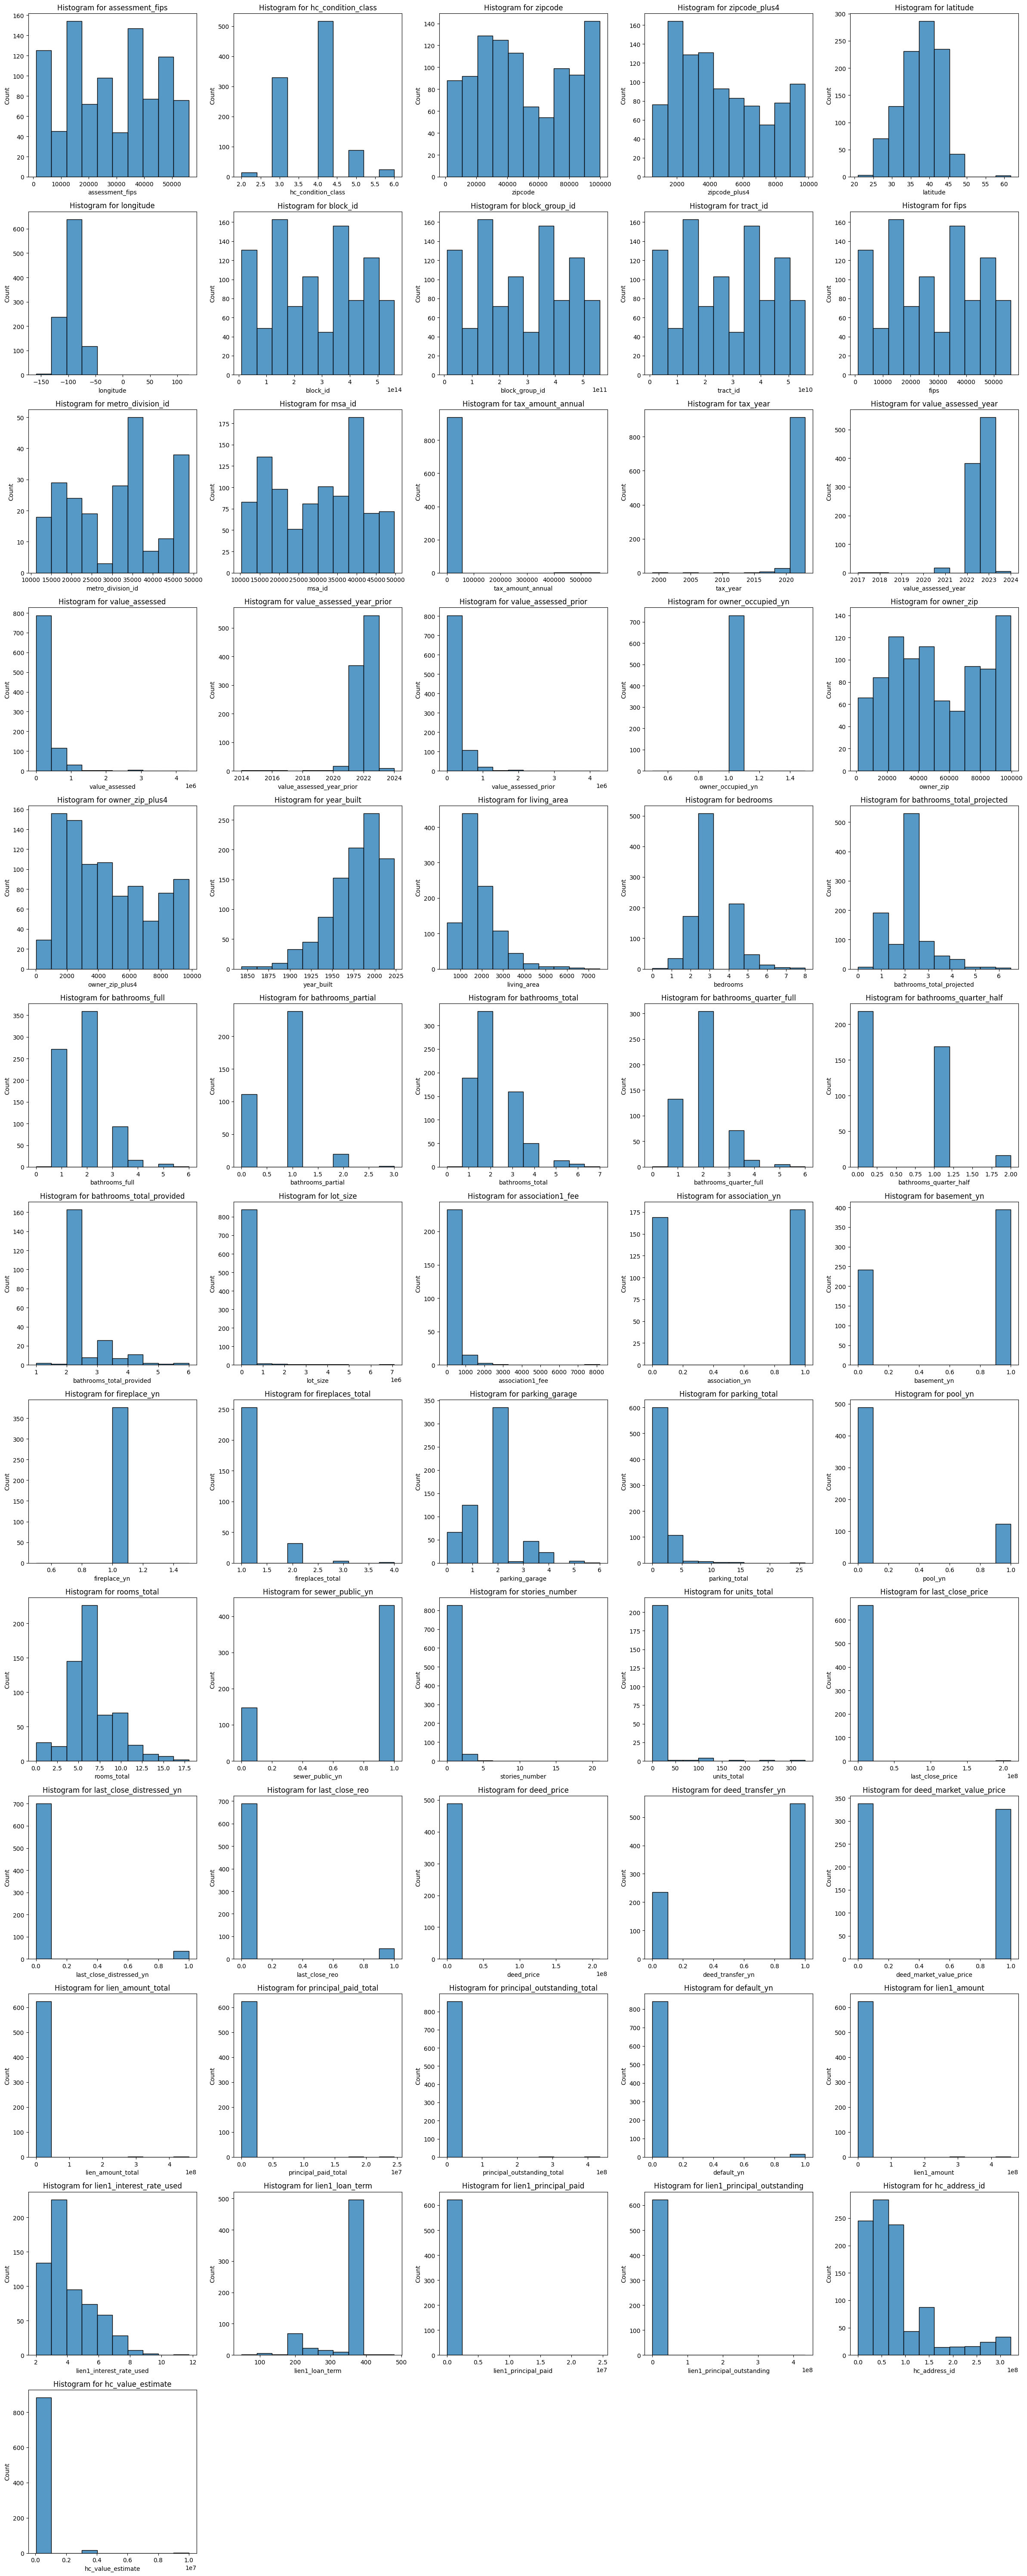

In [ ]:
# plotting numerical and categorical columns
print('Numerical Columns')
plt.figure(figsize=(24, 60))
col_count = 1
total_subplots = len(num_features)
num_rows = (total_subplots + 4) // 5

for col in num_features:
  plt.subplot(num_rows, 5, col_count)
  sns.histplot(df_num[col], kde=False, bins=10)
  plt.title(f'Histogram for {col}')
  col_count += 1

plt.tight_layout()
plt.show()

Categorical Columns


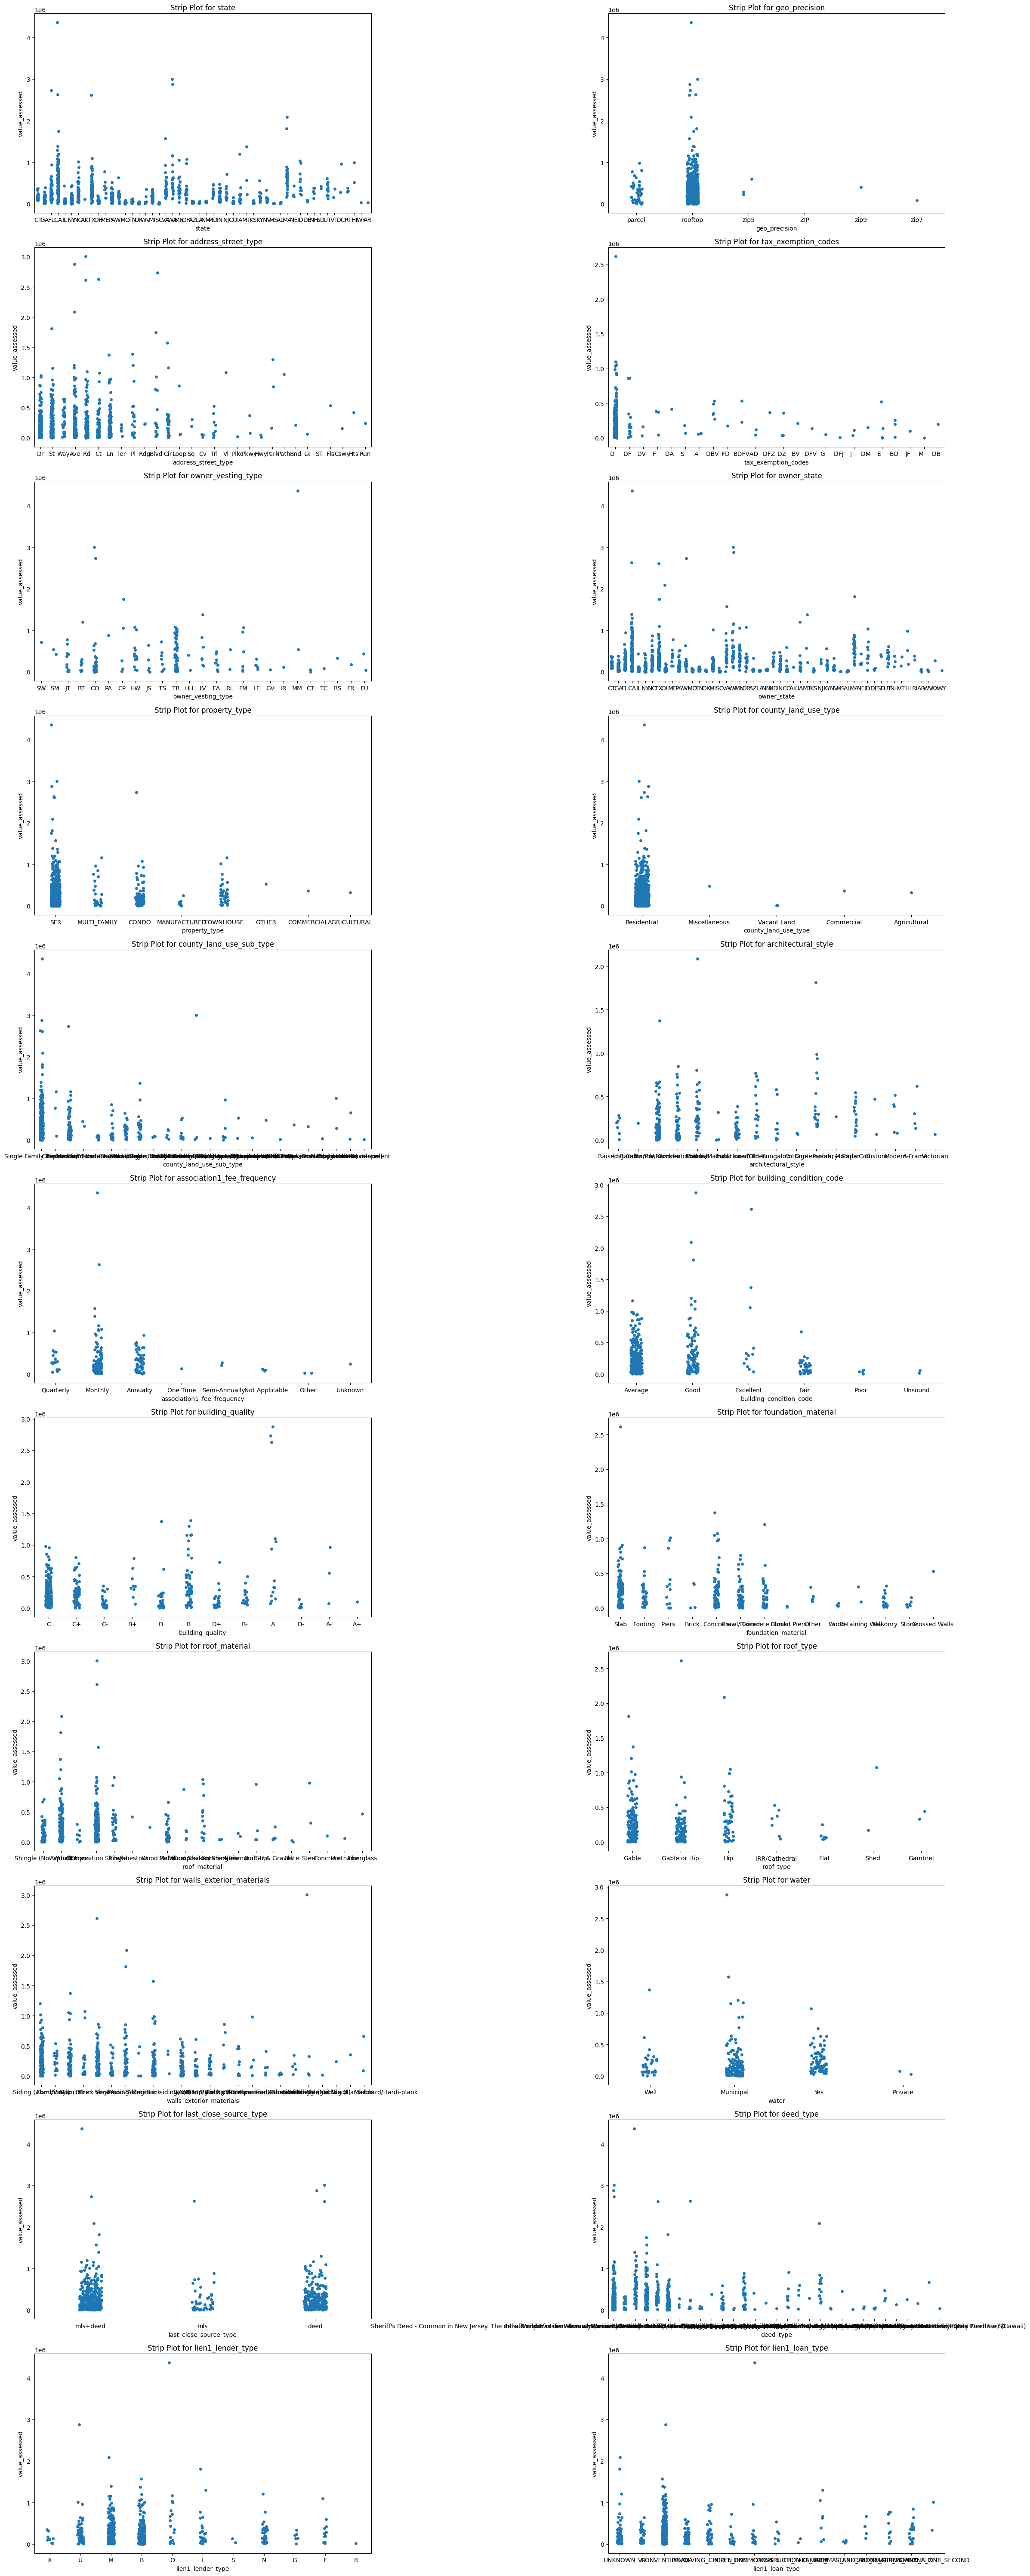

In [ ]:
# print categorical columns
print('Categorical Columns')
plt.figure(figsize=(24, 60))
col_count = 1
total_subplots = len(cat_features)
num_rows = (total_subplots + 1) // 2

for col in cat_features:
  plt.subplot(num_rows, 2, col_count)
  sns.stripplot(data=df_cat, x=col, y=data['value_assessed'])
  plt.title(f'Strip Plot for {col}')
  col_count += 1

plt.tight_layout()
plt.show()

Whats clear from the Categorical side is that the majority of those columns have a large amount of unique values. This will only add an extreme amount of noise so we look to get rid of as much of that as possible.

In [ ]:
# merge the three datasets back together
df_cleaned = pd.concat([df_num, df_cat, df_date], axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 88 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   assessment_fips              957 non-null    float64       
 1   hc_condition_class           972 non-null    float64       
 2   zipcode                      999 non-null    int64         
 3   zipcode_plus4                982 non-null    float64       
 4   latitude                     999 non-null    float64       
 5   longitude                    999 non-null    float64       
 6   block_id                     998 non-null    float64       
 7   block_group_id               998 non-null    float64       
 8   tract_id                     998 non-null    float64       
 9   fips                         998 non-null    float64       
 10  metro_division_id            227 non-null    float64       
 11  msa_id                       964 non-null    

Now lets check the correlation coefficient of our dataset to drop any columns that are too correlated with one another; limiting the power of their performance downstream when it comes time to train the model.

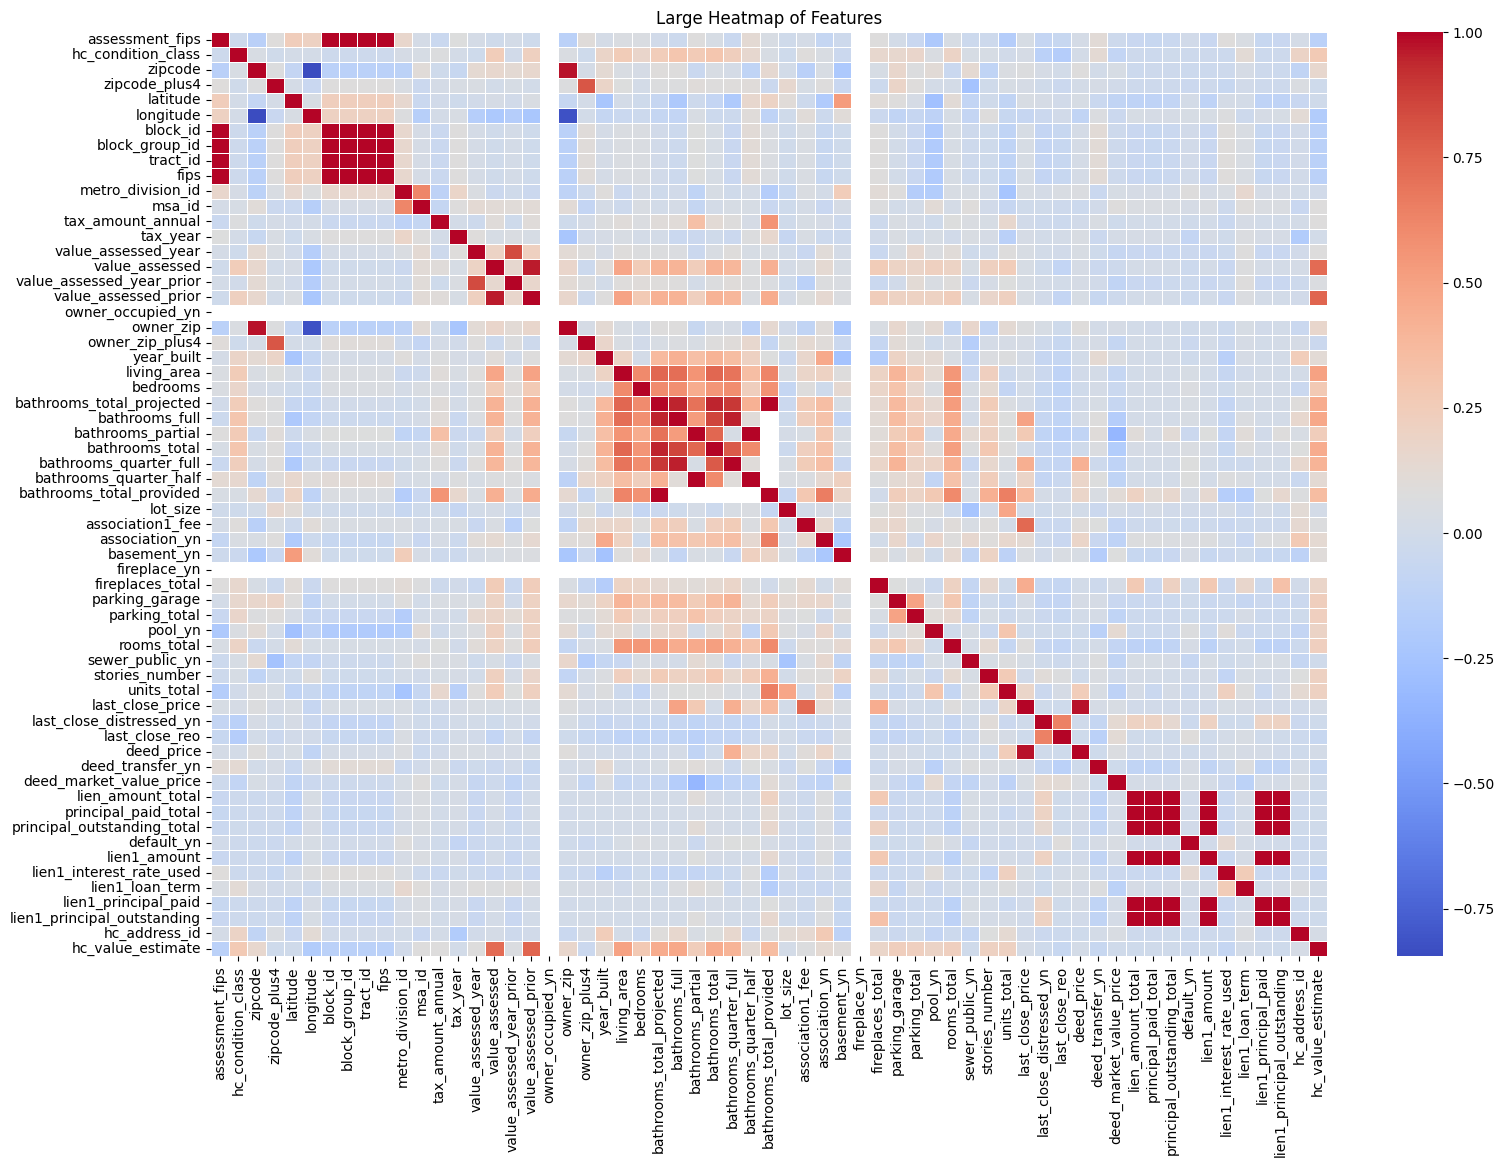

In [ ]:
fig, ax = plt.subplots(figsize=(18,12))

numeric_df = df_cleaned.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', ax=ax, linewidths=0.5)
plt.title('Large Heatmap of Features')
plt.show()

This is nice, but lets see if we can narrow our search down by removing the columns that have an absolute value of 0.1 correlation to our target variable.

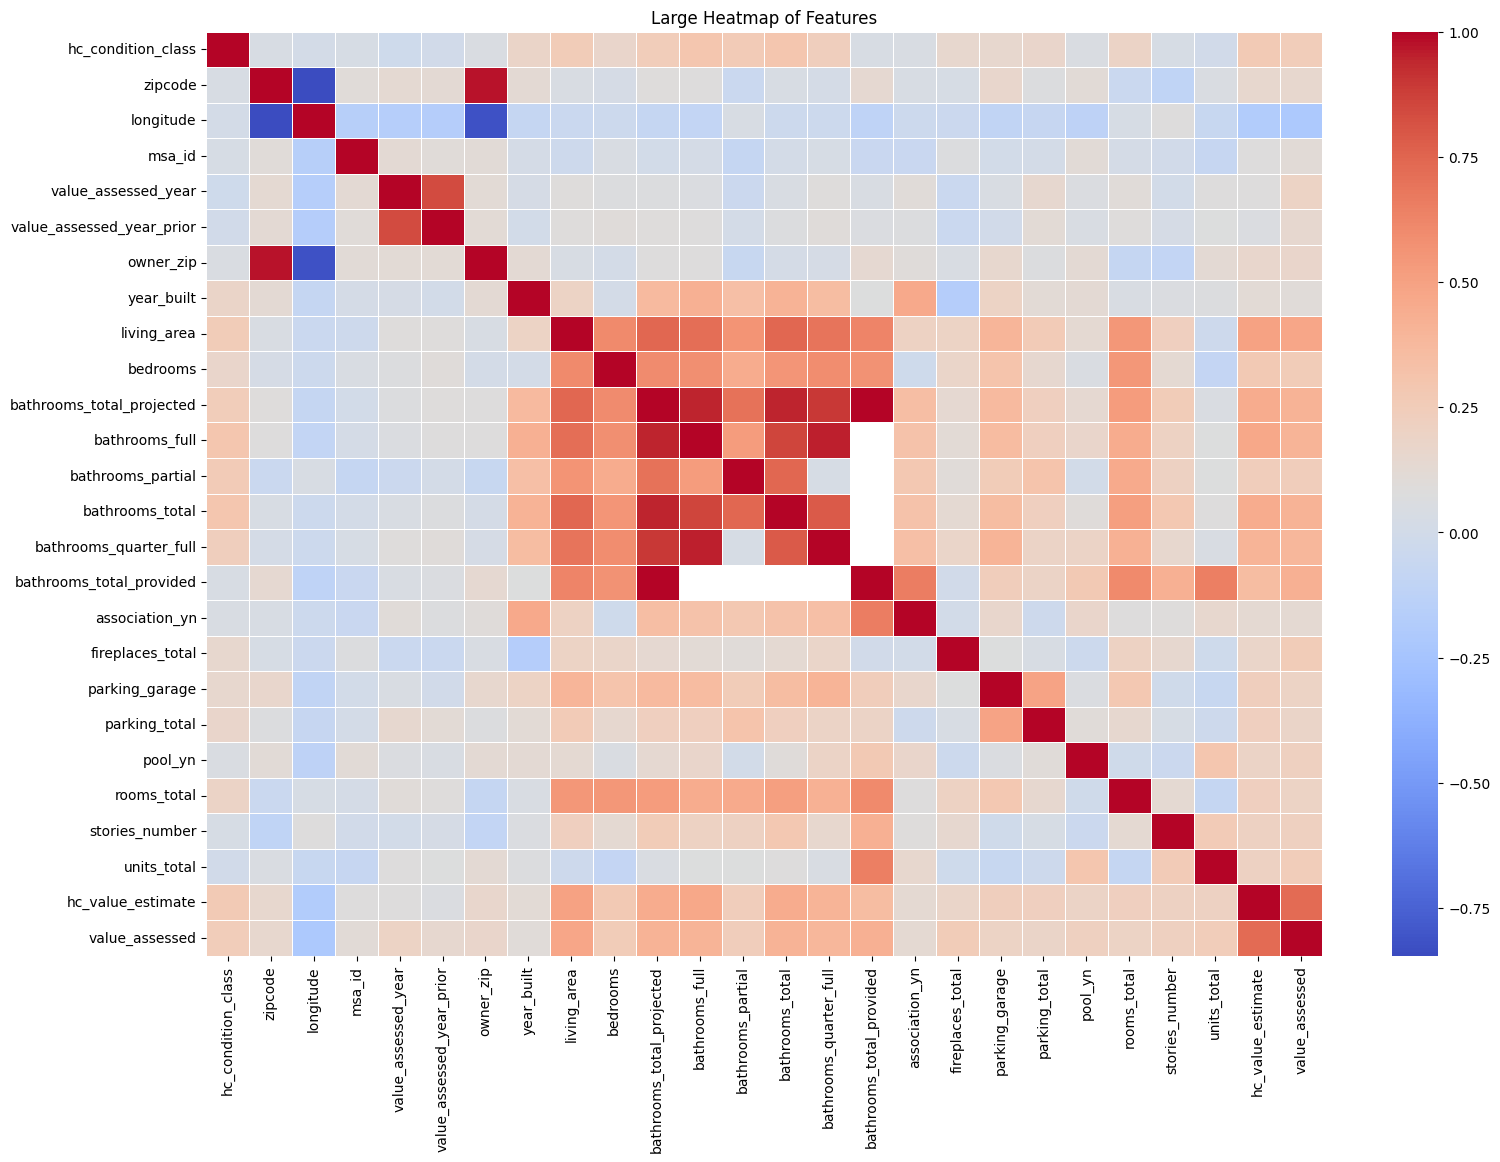

In [ ]:
target_corr = corr_matrix[target]

# filter columns out columns where their absolute correlation is >= 0.1 and <= 0.9
filtered_columns = target_corr[(abs(target_corr) >= 0.1) & (abs(target_corr) <= 0.9)].index.tolist()

filtered_df = numeric_df[filtered_columns + ['value_assessed']]

filtered_corr_matrix = filtered_df.corr()

fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', ax=ax, linewidths=0.5)
plt.title('Large Heatmap of Features')
plt.show()

Lets also just visually drop some columns that have a high correlation.

In [ ]:
filtered_df = (filtered_df.drop(['longitude',
                               'owner_zip',
                               'bathrooms_partial',
                               'bathrooms_total_provided',
                               'bathrooms_quarter_full',
                               'bathrooms_total_projected'],
                              axis=1))

In [ ]:
num_columns_to_keep = filtered_df.columns.tolist()
# filtered_df has the numeric columns left that I want to keep

columns_to_keep = [col for col in numeric_df.columns.tolist() if col in num_columns_to_keep]

In [ ]:
cat_columns_to_keep = df_cleaned.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
cat_columns_to_keep

['state',
 'geo_precision',
 'address_street_type',
 'tax_exemption_codes',
 'owner_vesting_type',
 'owner_state',
 'property_type',
 'county_land_use_type',
 'county_land_use_sub_type',
 'architectural_style',
 'association1_fee_frequency',
 'building_condition_code',
 'building_quality',
 'foundation_material',
 'roof_material',
 'roof_type',
 'walls_exterior_materials',
 'water',
 'last_close_source_type',
 'deed_type',
 'lien1_lender_type',
 'lien1_loan_type',
 'last_close_date',
 'deed_date',
 'lien1_contract_date',
 'lien1_due_date',
 'updated_at']

In [ ]:
df_cleaned = df_cleaned[columns_to_keep + cat_columns_to_keep]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   hc_condition_class          972 non-null    float64       
 1   zipcode                     999 non-null    int64         
 2   msa_id                      964 non-null    float64       
 3   value_assessed_year         951 non-null    float64       
 4   value_assessed              947 non-null    float64       
 5   value_assessed_year_prior   945 non-null    float64       
 6   year_built                  985 non-null    float64       
 7   living_area                 988 non-null    float64       
 8   bedrooms                    999 non-null    int64         
 9   bathrooms_full              749 non-null    float64       
 10  bathrooms_total             751 non-null    float64       
 11  association_yn              347 non-null    float64       

Part of the reason why I chose to use this dataset was because of this massive column space.
- It simulates many datasets in the industry and got me out of my comfort zone a little instead of the 'clean' practice datasets with a max of around 10 columns.

At the beginning stages of this project, I went through manually and selected which columns I wanted to keep. I used the data dictionary that was included with the dataset to go through and highlight features that I wanted to include for my model (which will be included as a reference for this project).

Note: In retrospect, I do not have very much domain knowledge on this topic so the columns that I chose to start with may not be ones that a domain knowledge expert would have chosen. If I were to do this part on the job, I would have opened a dialogue with different stakeholders and domain experts to come up with a more targeted feature landscape.

As I grew in my knowledge of data science, I kept the old dataframe as reference to see the difference from manual to automatic.


In [ ]:
df_old = data[['state', 'property_type', 'living_area', 'bedrooms',
           'bathrooms_full', 'bathrooms_partial', 'lot_size', 'architectural_style',
            'basement_yn', 'fireplace_yn', 'fireplaces_total', 'parking_garage',
           'parking_total', 'pool_yn', 'rooms_total']]

In [ ]:
df_cleaned_cols = set(df_cleaned.columns)
df_old_cols = set(df_old.columns)

df_cleaned_len = len(df_cleaned_cols)
df_old_len = len(df_old_cols)

diff_cleaned = df_cleaned_cols - df_old_cols
diff_cleaned_len = df_cleaned_len - df_old_len

# print(diff_cleaned)
print(diff_cleaned_len)

31


## Revisiting Missing Values

First and foremost we need to locate all the null values in the dataset and convert them into `NaN` values.
- This will make all of the operations we need to do on this dataset a lot easier

In [ ]:
df_cleaned.replace('nan', np.nan)
df_cleaned.isnull().sum().sort_values(ascending=False)

,0
association1_fee_frequency,795
owner_vesting_type,794
units_total,781
water,754
fireplaces_total,710
tax_exemption_codes,708
architectural_style,697
roof_type,694
foundation_material,653
association_yn,652


Since these features vary so much in terms of what they represent, we cannot just fill all NaN values with zero. In doing so, we would hurt our model's performance. We will have to take a targeted approach to segment the columns using different feature engineering techniques.

Judging from the list, `pool_yn` is the only column that looks binary to me. So we will replace the values with 0 and 1.

In [ ]:
print(df_cleaned['pool_yn'].unique())

[ 1. nan  0.]


In [ ]:
df_cleaned.loc[:, 'pool_yn'] = df_cleaned['pool_yn'].replace(np.nan, 0)
df_cleaned['pool_yn'].unique()

array([1., 0.])

I then made the executive decision to cut any columns that have more than 50% of values filled in as NaN values.
- These columns will only lead to added noise and confuse the model down the line.

In [ ]:
df_cleaned = df_cleaned.dropna(thresh=0.5*len(df_cleaned), axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hc_condition_class         972 non-null    float64       
 1   zipcode                    999 non-null    int64         
 2   msa_id                     964 non-null    float64       
 3   value_assessed_year        951 non-null    float64       
 4   value_assessed             947 non-null    float64       
 5   value_assessed_year_prior  945 non-null    float64       
 6   year_built                 985 non-null    float64       
 7   living_area                988 non-null    float64       
 8   bedrooms                   999 non-null    int64         
 9   bathrooms_full             749 non-null    float64       
 10  bathrooms_total            751 non-null    float64       
 11  parking_garage             604 non-null    float64       
 12  parking_

To start the feature engineering process, we will take all the features that can take a zero input (such as bathrooms full, etc.). These are categorical variables with either yes/no inputs or a discrete (countable) number of inputs.

In deciding which columns to add to the list, I iteratively used the `.unique()` to observe the different values of the feature.

### Categorical Columns

In [ ]:
def see_unique_cat(df_cleaned):
    for col in df_cleaned.columns:
        if df_cleaned[col].dtypes == object:  # checks for string/object columns
            print(f"Unique Values for {col}: {df_cleaned[col].unique()}", '\n')

In [ ]:
see_unique_cat(df_cleaned)

Unique Values for state: ['CT' 'GA' 'FL' 'CA' 'IL' 'NY' 'NC' 'AK' 'TX' 'OH' 'ME' 'PA' 'WI' 'MO'
 'TN' 'OK' 'WV' 'MI' 'SC' 'VA' 'WA' 'MN' 'OR' 'AZ' 'LA' 'NM' 'MD' 'IN'
 'NJ' 'CO' 'IA' 'MT' 'KS' 'KY' 'NV' 'MS' 'AL' 'MA' 'NE' 'ID' 'DE' 'NH'
 'SD' 'UT' 'VT' 'DC' 'RI' 'HI' 'WY' 'AR'] 

Unique Values for geo_precision: ['parcel' 'rooftop' 'zip5' 'ZIP' 'zip9' 'zip7'] 

Unique Values for address_street_type: ['Dr' 'St' 'Way' 'Ave' nan 'Rd' 'Ct' 'Ln' 'Ter' 'Pl' 'Rdg' 'Blvd' 'Cir'
 'Loop' 'Sq' 'Cv' 'Trl' 'Vl' 'Pike' 'Pkwy' 'Hwy' 'Park' 'Path' 'Bnd' 'Lk'
 'ST' 'Fls' 'Cswy' 'Hts' 'Run'] 

Unique Values for owner_state: ['CT' 'GA' 'FL' 'CA' 'IL' 'NY' 'NC' nan 'TX' 'OH' 'ME' 'PA' 'WI' 'MO' 'TN'
 'OK' 'MI' 'SC' 'VA' 'WA' 'MN' 'OR' 'AZ' 'LA' 'NM' 'MD' 'IN' 'CO' 'AK'
 'IA' 'MT' 'KS' 'NJ' 'KY' 'NV' 'MS' 'AL' 'MA' 'NE' 'ID' 'DE' 'SD' 'UT'
 'NH' 'VT' 'HI' 'RI' 'AR' 'WV' 'XX' 'WY'] 

Unique Values for property_type: ['SFR' 'MULTI_FAMILY' 'CONDO' 'MANUFACTURED' 'TOWNHOUSE' 'OTHER'
 'COMMERCIAL' 'AGRICULTURA

In [ ]:
cat_columns_to_fill = df_cleaned.select_dtypes(exclude=['int64', 'float64', 'datetime64']).columns.tolist()

# Use dict comprehension to create the fill dictionary
fill_dict = {col: 'Other' for col in cat_columns_to_fill}

# Apply fillna with the created dictionary
df_cleaned = df_cleaned.fillna(fill_dict)

### Numerical Columns

In [ ]:
def see_unique_num(df_cleaned):
    for col in df_cleaned.columns:
        if df_cleaned[col].dtypes == int or float:  # checks for int/float columns
            print(f"NaN Values for {col}: {df_cleaned[col].isnull()}", '\n')

In [ ]:
see_unique_num(df_cleaned)

NaN Values for hc_condition_class: 0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: hc_condition_class, Length: 999, dtype: bool 

NaN Values for zipcode: 0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: zipcode, Length: 999, dtype: bool 

NaN Values for msa_id: 0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: msa_id, Length: 999, dtype: bool 

NaN Values for value_assessed_year: 0      False
1      False
2      False
3      False
4      False
       ...  
994    False
995    False
996    False
997    False
998    False
Name: value_assessed_year, Length: 999, dtype: bool 

NaN Values for value_assessed: 0      False
1      False
2      False
3      False
4      False
       ...  
994    Fals

In [ ]:
missing_threshold = 0.5

columns_to_drop = df_cleaned.columns[df_cleaned.isnull().mean() > missing_threshold]
print('List of Dropped Columns: ', list(columns_to_drop), '\n')
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned.info()

List of Dropped Columns:  [] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hc_condition_class         972 non-null    float64       
 1   zipcode                    999 non-null    int64         
 2   msa_id                     964 non-null    float64       
 3   value_assessed_year        951 non-null    float64       
 4   value_assessed             947 non-null    float64       
 5   value_assessed_year_prior  945 non-null    float64       
 6   year_built                 985 non-null    float64       
 7   living_area                988 non-null    float64       
 8   bedrooms                   999 non-null    int64         
 9   bathrooms_full             749 non-null    float64       
 10  bathrooms_total            751 non-null    float64       
 11  parking_garage             604 non-null 

Before we implement Feature Engineering, it's a good idea to see which rows have an excess of null values in them that could sway our model's performance.

Now we need to show how many rows have an excess of null values in them. This will determine if these rows will be dropped so as to maintain a solid foundation of data for the model.

In [ ]:
df_cleaned['null_count'] = df_cleaned.isnull().sum(axis=1)
df_cleaned['null_count'].sort_values(ascending=False)

,null_count
280,12
864,12
275,12
747,12
123,11
...,...
879,0
175,0
882,0
512,0


In [ ]:
df_cleaned.iloc[280]

,280
hc_condition_class,NaN
zipcode,78207
msa_id,41700.0
value_assessed_year,NaN
value_assessed,NaN
value_assessed_year_prior,NaN
year_built,2023.0
living_area,NaN
bedrooms,2
bathrooms_full,1.0


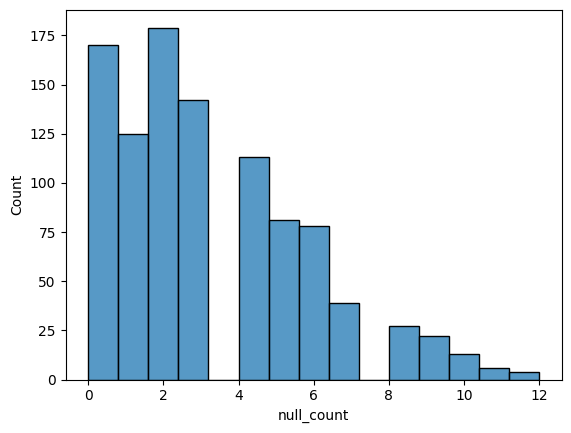

In [ ]:
sns.histplot(x='null_count', data=df_cleaned)
plt.show()

It took several iterations to get to optimal place with the data in regards to null values. Since our rows remaining do not have a high level of null values, I will decide to keep as much data as possible.
- however we will drop all rows with a higher than 8 null count to keep our data foundationally solid

In [ ]:
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['null_count'] >= 8].index)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 998
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hc_condition_class         915 non-null    float64       
 1   zipcode                    927 non-null    int64         
 2   msa_id                     901 non-null    float64       
 3   value_assessed_year        914 non-null    float64       
 4   value_assessed             912 non-null    float64       
 5   value_assessed_year_prior  908 non-null    float64       
 6   year_built                 918 non-null    float64       
 7   living_area                921 non-null    float64       
 8   bedrooms                   927 non-null    int64         
 9   bathrooms_full             719 non-null    float64       
 10  bathrooms_total            718 non-null    float64       
 11  parking_garage             591 non-null    float64       
 12  parking_total

We will now drop the `null_count` column since we are done with its information.

In [ ]:
df_cleaned = df_cleaned.drop(['null_count'], axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 998
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   hc_condition_class         915 non-null    float64       
 1   zipcode                    927 non-null    int64         
 2   msa_id                     901 non-null    float64       
 3   value_assessed_year        914 non-null    float64       
 4   value_assessed             912 non-null    float64       
 5   value_assessed_year_prior  908 non-null    float64       
 6   year_built                 918 non-null    float64       
 7   living_area                921 non-null    float64       
 8   bedrooms                   927 non-null    int64         
 9   bathrooms_full             719 non-null    float64       
 10  bathrooms_total            718 non-null    float64       
 11  parking_garage             591 non-null    float64       
 12  parking_total

In [ ]:
df_cleaned.isnull().sum()

,0
hc_condition_class,12
zipcode,0
msa_id,26
value_assessed_year,13
value_assessed,15
value_assessed_year_prior,19
year_built,9
living_area,6
bedrooms,0
bathrooms_full,208


We will now also drop the datetime columns since our model most likely will have nothing to do with them.
- in a future iteration of this project, I might come back and visit this point
- for now, the columns will be dropped

In [ ]:
df_cleaned = df_cleaned.drop(columns = df_cleaned.select_dtypes(include=['datetime64']).columns, axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 927 entries, 0 to 998
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hc_condition_class         915 non-null    float64
 1   zipcode                    927 non-null    int64  
 2   msa_id                     901 non-null    float64
 3   value_assessed_year        914 non-null    float64
 4   value_assessed             912 non-null    float64
 5   value_assessed_year_prior  908 non-null    float64
 6   year_built                 918 non-null    float64
 7   living_area                921 non-null    float64
 8   bedrooms                   927 non-null    int64  
 9   bathrooms_full             719 non-null    float64
 10  bathrooms_total            718 non-null    float64
 11  parking_garage             591 non-null    float64
 12  parking_total              702 non-null    float64
 13  pool_yn                    927 non-null    float64
 14 

Even though our columns still have a few non-null values in them, they have been cleaned and are ready for furthering processing.

In this notebook, I demonstrated using advanced data cleaning techniques to prepare a large, real-world dataset for ML modeling.
- we went from 184 columns down to 30 with room for further columns to be dropped
- we used correlation and statistics to systematically verify that the columns we dropped were not going to be relevant for ML model prediction & performance

See the next notebook where the project continues to implement feature engineering and modeling techniques.

In [ ]:
def export_data(df, filename):
  df.to_excel(filename)

In [ ]:
export_data(df_cleaned.reset_index(), '/content/drive/MyDrive/PROJECTS/Housing_Data_Project/df_cleaned.xlsx')

#  Sources

- https://www.kaggle.com/code/ulrikthygepedersen/exploratory-data-analysis-house-prices
- https://www.kaggle.com/code/ulrikthygepedersen/feature-engineering-house-prices/notebook